<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1608768000&v=beta&t=2xuCh9kIGEeB_dLvnbLm9tAOzMU3dAvyssm5tbazr7c" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema: Clasificación Basado en Árboles 

### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)


### Librerías Necesarias.

In [ ]:
#pip install sklearn

In [ ]:
#pip install subprocess.run

In [3]:
#pip install pyparsing
#!pip install pygraphviz 

In [16]:
#!pip install graphviz

In [ ]:
#pip install pydot

In [9]:
#pip install mlxtend

In [ ]:
#pip install pydotplus

# Cargar y Preprocesar la data

Para este caso usaremos la data diabetes.

In [3]:
import numpy as np
import pandas as pd

- Usamos la función read_excel para abrir el archivo "diabetes_py".

In [4]:
bu = pd.read_excel('D:/SOCIAL DATA/Dropbox/Python 4ta edición - Programa Completo/3. avanzado/sesión_01/datos/diabetes_py.xlsx')

- Muestra de las 5 primeras muestras de la data

In [5]:
bu.head(10)

,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199
3,1,90,323,240
4,1,86,381,157
5,1,100,350,221
6,1,85,301,186
7,1,97,379,142
8,1,97,296,131
9,1,91,353,221


- Valores únicos de la variable target

In [7]:
import numpy as np
print('class labels', np.unique(bu.iloc[:,0])) #  usamos la función uniquwe, de la librería numpy, para encontrar 
                                               #  los valores únicos de la variable target. bu.iloc, lo usamos para selec-
                                               #  cionar la variables target de la data bupa, en este caso ubicado en la 
                                               #  primera columna
### clase 1 = normal
### clase 2 = pre-diabetico
### clase 3 = diabetico

class labels [1 2 3]


- Separamos la data, una de entrenamiento y otra de prueba.
- También, para esta parte, solo usaremos dos variables, glucosa e insulina. 

In [8]:
from sklearn.model_selection import train_test_split
x, y = bu.iloc[:, 1:4].values, bu.iloc[:, 0].values  ## separamos las variables predictoras (glucosa, insulina[:,1:3]) y la variable dependiente

In [9]:
x

array([[  97,  289,  117],
       [ 105,  319,  143],
       [  90,  356,  199],
       [  90,  323,  240],
       [  86,  381,  157],
       [ 100,  350,  221],
       [  85,  301,  186],
       [  97,  379,  142],
       [  97,  296,  131],
       [  91,  353,  221],
       [  87,  306,  178],
       [  78,  290,  136],
       [  90,  371,  200],
       [  80,  393,  202],
       [  90,  364,  152],
       [  99,  359,  185],
       [  85,  296,  116],
       [  90,  345,  123],
       [  90,  378,  136],
       [  88,  304,  134],
       [  90,  327,  192],
       [  92,  386,  279],
       [  98,  365,  145],
       [ 100,  352,  172],
       [  86,  325,  179],
       [  98,  321,  222],
       [  70,  360,  134],
       [  99,  336,  143],
       [  75,  352,  169],
       [  90,  353,  263],
       [  85,  373,  174],
       [  99,  376,  134],
       [ 100,  367,  182],
       [  78,  335,  241],
       [ 106,  396,  128],
       [ 102,  378,  165],
       [  90,  360,  282],
 

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=int64)

In [11]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, ### separamos en 4 objetos las variables, dos seran de prueba y dos de entrenamiento
                        stratify=y, random_state=2019)  ### le damos el 30% a la dara de prueba
## usamos la función model_selection, de la librería sklearn
## Para este caso, también solo se usara

# Árbol de Decisión

- Los árboles de decisión pueden generar límites de decisión complejos dividiendo las caracteríticas en rectangulos. Sin embargo, debemos con cuidado puesto que cuanto más profundo es es el árbol de decisión, más complejo es el límite de decisión, el cual puede caer más facilmente en el sobreajuste. 

Entrenamos un árbol de decisión con una profundidad máxima de 3, utilizando la entropía como criterio para la impureza.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

In [13]:
from sklearn.model_selection import train_test_split
x, y = bu.iloc[:, 1:3].values, bu.iloc[:, 0].values  ## separamos las variables predictoras (glucosa, insulina[:,1:3]) y la variable dependiente
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split (x, y, test_size=0.3, ### separamos en 4 objetos las variables, dos seran de prueba y dos de entrenamiento
                        stratify=y)   ### le damos el 30% a la dara de prueba
## usamos la función model_selection, de la librería sklearn
## Para este caso, también solo se usara

In [14]:
x

array([[  97,  289],
       [ 105,  319],
       [  90,  356],
       [  90,  323],
       [  86,  381],
       [ 100,  350],
       [  85,  301],
       [  97,  379],
       [  97,  296],
       [  91,  353],
       [  87,  306],
       [  78,  290],
       [  90,  371],
       [  80,  393],
       [  90,  364],
       [  99,  359],
       [  85,  296],
       [  90,  345],
       [  90,  378],
       [  88,  304],
       [  90,  327],
       [  92,  386],
       [  98,  365],
       [ 100,  352],
       [  86,  325],
       [  98,  321],
       [  70,  360],
       [  99,  336],
       [  75,  352],
       [  90,  353],
       [  85,  373],
       [  99,  376],
       [ 100,  367],
       [  78,  335],
       [ 106,  396],
       [ 102,  378],
       [  90,  360],
       [  94,  291],
       [  80,  269],
       [  93,  318],
       [  96,  356],
       [  88,  291],
       [  94,  313],
       [  93,  306],
       [  86,  319],
       [  96,  332],
       [  86,  323],
       [  89,

In [15]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=int64)

In [11]:
from sklearn.tree import DecisionTreeClassifier 

In [16]:

tree = DecisionTreeClassifier(criterion='entropy', #medida para impureza
                              min_samples_split=20, #observaciones de nodo
                              max_depth = 3, #profundidad del árbol
                              random_state=2020) #semilla
#max_depth = 4, random_state=1
## almacenar en el objeto tree = la función DecisionTreeClassifier

#### Validación cruzada

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, #función del modelo
                         X_TRAIN, #x de entrenamiento
                         Y_TRAIN, #y de entrenamiento
                         scoring="accuracy",  #métrica, en este caso usaremos la tasa de acierto
                         cv=30) ##n de muestras de los datos

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 16 members, which is too few. The minimum number of members in any class cannot be less than n_splits=30.
  % (min_groups, self.n_splits)), Warning)


In [18]:
scores

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 0.5 , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

#### Elaboración del modelo

In [22]:
tree.fit(X_TRAIN, Y_TRAIN) ## Usamos la data de entrenamiento para crear el árbol

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2020, splitter='best')

In [18]:
x_combined= np.vstack((X_TRAIN, X_TEST)) ## Combinamos las variables x
y_combined= np.hstack((Y_TRAIN, Y_TEST)) ## Combinamos las varialbes y 

In [23]:
plot_decision_regions(x_combined, 
                      y_combined, 
                      clf=tree, 
                      X_highlight=X_TEST) 
## Gráficamos el árbol en base a áreas, con la función "plot_decision_regions"
plt.xlabel('glucosa') ## asignamos el nombre al eje x
plt.ylabel('insulina')## asignamos el nombre al eje y
plt.legend(loc='upper left')## posición de la leyenda
plt.show() ##gráficamos

NameError: name 'x_combined' is not defined

In [24]:
print('DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION')
print()
print('Precisión del modelo:')
print(tree.score(X_TRAIN, Y_TRAIN))
print(tree.score(X_TEST, Y_TEST))

DATOS DEL MODELO ÁRBOLES DE DECISIÓN REGRESION

Precisión del modelo:
1.0
0.9714285714285714


### Graficar el Árbol

- Scikit-learn nos permite exportar el árbol en un archivo .dot, que podemos visualizar con el programa GraphViz.

In [25]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
import graphviz
#import pygraphviz 
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from subprocess import check_call

In [26]:
#Datos de entrenamiento
x_t= pd.DataFrame(x_train, #vaiores de la matriz de datos de entreniento
                  columns=["glucosa", "insulina", "sspg"]) #etiquetas de columnas
y_t= pd.DataFrame(y_train, #valores de y para nuestros datos de entrenamiento
                  columns=["clase"]) #etiqueta de la columna

bupa_entrenamiento = pd.concat([x_t, y_t], #utilizamos concat para concatenar los dataframe generados 
                               axis=1) #axis = 1 indica que se concatena por columna
bupa_entrenamiento.head()

,glucosa,insulina,sspg,clase
0,86,319,144,1
1,173,832,102,3
2,100,352,172,1
3,86,323,158,1
4,86,393,115,1


In [27]:
colnames = bupa_entrenamiento.columns.tolist() #columns.tolist() extrae las etiquetas de las columnas
colnames #consultamos el objeto generado

['glucosa', 'insulina', 'sspg', 'clase']

In [28]:
predictors = colnames[0:3] #guardamos las etiquetas del orden 0 hasta el 3
predictors

['glucosa', 'insulina', 'sspg']

In [29]:
target = colnames[3]
target

'clase'

In [30]:
tree = DecisionTreeClassifier(criterion='entropy', #criterio para medir la impureza del árbol
                              min_samples_split=20, #mínimo de observaciones en los nodas
                              max_depth = 3, #profundidad máxima del árbol
                              random_state=99) #semilla

In [31]:
tree_fit =tree.fit(x_train, y_train) ## Usamos la data de entrenamiento para crear el árbol


In [32]:
import os

In [33]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [34]:
with open("bupa_dtree.dot", "w") as dotfile:
    export_graphviz(tree_fit, #modelo
                    out_file=dotfile, #objeto a generar
                    feature_names=predictors) #etiquetas de los predictores
    dotfile.close() #cerramos la creación del objeto

In [35]:
import os
from graphviz import Source

In [36]:
import os

In [37]:
os.getcwd()

'C:\\Users\\SOCIAL DATA'

In [38]:
os.environ["PATH"] += os.pathsep + 'C:/Users/SOCIAL DATA/'

In [41]:
#Source(text)

In [40]:
file = open("bupa_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="insulina <= 420.5\\nentropy = 1.408\\nsamples = 80\\nvalue = [46, 18, 16]"] ;\n1 [label="entropy = 0.0\\nsamples = 45\\nvalue = [45, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="glucosa <= 117.0\\nentropy = 1.156\\nsamples = 35\\nvalue = [1, 18, 16]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.297\\nsamples = 19\\nvalue = [1, 18, 0]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 16\\nvalue = [0, 0, 16]"] ;\n2 -> 4 ;\n}'

In [54]:
#pip install pydotplus

In [50]:
import matplotlib.pyplot as plt

In [51]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

In [52]:
dot_data = export_graphviz(tree_fit,
                           feature_names=predictors)

In [53]:
from IPython.display import Image 

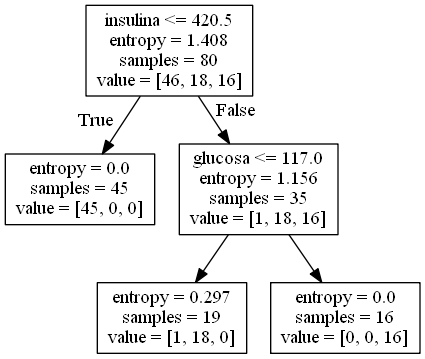

In [54]:
# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [55]:
graph = graph_from_dot_data(dot_data)

In [56]:
graph

In [50]:
graph.write_png('tree_2.png')
#write_png(): para guardar el gráfico de árboles

True

### Validación del modelo

##### accuracy 

In [57]:
#entrenamiento 
tree.score(x_train, #valores de los predictores de entrenamiento
           y_train) #valores de nuestro target 
#score()

0.9875

In [58]:
probs = tree_fit.predict(x_train)
#predict(): función para calcular los valores predichos
probs

array([1, 3, 1, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       3, 2, 1, 3, 1, 1, 2, 2, 1, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 1, 1,
       1, 2, 3, 2, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3], dtype=int64)

In [59]:
probs2 = tree_fit.predict(x_test)#datos de testeo
#predict(): función para calcular los valores predichos
probs2

array([1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 2, 3, 1, 2,
       1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 3, 2], dtype=int64)

In [61]:
from sklearn import metrics

In [62]:
metrics.accuracy_score(y_test, probs2)#accuracy para nuestros datos de testeo

1.0

In [63]:
metrics.accuracy_score(y_train, probs) #accuracy para nuestros datos de entrenamiento

0.9875

## Laboratorio

### Información del conjunto de datos

Esta investigación tuvo como objetivo el caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad estimada de incumplimiento será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles.

### Información de los atributos

- ID: ID de cada cliente
- LIMIT_BAL: Cantidad de crédito otorgado en dólares NT (incluye crédito individual y familiar / complementario
- SEX: Género (1 = masculino, 2 = femenino)
- EDUCATION: (1 = escuela de posgrado, 2 = universidad, 3 = escuela secundaria, 4 = otros, 5 = desconocido, 6 = desconocido)
- MARRIAGE:  Estado civil (1 = casado, 2 = soltero, 3 = otros)
- AGE: edad en años
- PAY_0: Estado de reembolso en septiembre de 2005 (-1 = pago debidamente, 1 = retraso en el pago durante un mes, 2 = retraso en el pago durante dos meses, ... 8 = retraso en el pago durante ocho meses, 9 = retraso en el pago durante nueve meses y más)
- PAY_2:  Estado de reembolso en agosto de 2005 (escala igual a la anterior)
- PAY_3:  Estado de reembolso en julio de 2005 (escala igual a la anterior)
- PAY_4: Estado de reembolso en junio de 2005 (escala igual a la anterior)
- PAY_5: Estado de reembolso en mayo de 2005 (escala igual a la anterior)
- PAY_6: Estado de reembolso en abril de 2005 (escala igual a la anterior)
- BILL_AMT1: Monto de extracto de cuenta en septiembre de 2005 (dólar NT)
- BILL_AMT2: Monto de extracto de cuenta en agosto de 2005 (dólar NT)
- BILL_AMT3: Monto de extracto de cuenta en julio de 2005 (dólar NT)
- BILL_AMT4: Monto del estado de cuenta en junio de 2005 (dólar NT)
- BILL_AMT5: Monto del estado de cuenta en mayo de 2005 (dólar NT)
- BILL_AMT6: Monto del estado de cuenta en abril de 2005 (dólar NT)
- PAY_AMT1: Monto del pago anterior en septiembre de 2005 (NT dólar)
- PAY_AMT2: Monto del pago anterior en agosto de 2005 (dólar NT)
- PAY_AMT3: Monto del pago anterior en julio de 2005 (dólar NT)
- PAY_AMT4: Monto del pago anterior en junio de 2005 (dólar NT)
- PAY_AMT5: Monto del pago anterior en mayo de 2005 (dólar NT)
- PAY_AMT6: Monto del pago anterior en abril de 2005 (dólar NT)
- default.payment.next.month:pago predeterminado (1 = sí, 0 = no)

### Fuente de Datos

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### Solicitud de cita:

Yeh, I. C. y Lien, C. H. (2009). Las comparaciones de las técnicas de minería de datos para la precisión predictiva de la probabilidad de incumplimiento de los clientes de tarjetas de crédito. Sistemas expertos con aplicaciones, 36 (2), 2473-2480.

In [1]:
import os
os.chdir("D:/Python/sbs/data/")

In [2]:
# Load the packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import model_evaluation_utils as meu

In [3]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("UCI_Credit_Card.csv") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Actividades:

1. Construir data de entrenamiento y testeo
2. Utilizar UnderSampling para balanceo de datos, teniendo en cuenta los siguientes parámetros: 07 para proporción de etiquetas poco representadas y 2020 como semilla.
3. Construir el modelo de árboles de decisión
4. Graficar el árbol de decisión.
5. Generar las gráficas de variables importantes.
6. Métricas de evaluación de modelos para datos de entrenamiento y testeo

[Ir a Inicio](#beginning)

_____